# Week 2: Optimal Bayesian Design with Mutual Information and Linear Regression

In [1]:
import autograd.numpy as np
from autograd import grad
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats, integrate, optimize
from tqdm.notebook import tqdm, trange

In [2]:
# assumption
noise = 0.2

In [31]:
# NEW THINGS
def mut_2(d, covariance_prior, dim=2):
    d = d.reshape(int(len(d)/dim), dim)
    var_y = noise * np.eye(d.shape[0])
    cov_posterior = covariance_prior - covariance_prior @ d.T @ np.linalg.inv(var_y + d @ covariance_prior @ d.T) @ d @ covariance_prior
    val = 0.5 * np.log(np.linalg.det(2*np.pi*np.e*cov_posterior)) - 0.5 * np.log(np.linalg.det(2*np.pi*np.e*covariance_prior))
    return val


In [27]:
prior = np.array([[7.9, 3], [4, 5]])
def f(x):
    return -mut_2(x, prior)
def get_optimal_design(start):
    steps = optimize.minimize(f, start, method="BFGS", jac=grad(f), options={ "return_all": True })
    return steps


In [32]:
get_optimal_design(np.array([[1.2, 2.2], [3.3, 3.2], [2.5, 5.5], [9.5, -2.5]]))

/tmp/ipykernel_5901/1050895063.py:5: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  steps = optimize.minimize(f, start, method="BFGS", jac=grad(f), options={ "return_all": True })


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.0533796057643485e-12
        x: [ 6.352e-08  1.461e-07  4.736e-08  7.836e-08 -4.688e-08
            -1.182e-07 -2.782e-08  7.028e-08]
      nit: 27
      jac: [ 5.066e-06  4.764e-06  3.242e-06  2.788e-06 -3.920e-06
            -3.776e-06  1.309e-07  1.270e-06]
 hess_inv: [[ 3.832e-02 -2.497e-02 ... -5.747e-04  1.113e-03]
            [-2.497e-02  6.113e-02 ...  2.442e-03 -5.674e-05]
            ...
            [-5.747e-04  2.442e-03 ...  3.370e-02 -2.294e-02]
            [ 1.113e-03 -5.674e-05 ... -2.294e-02  5.772e-02]]
     nfev: 57
     njev: 57
  allvecs: [array([ 1.200e+00,  2.200e+00,  3.300e+00,  3.200e+00,
                   2.500e+00,  5.500e+00,  9.500e+00, -2.500e+00]), array([ 3.672e-01, -1.370e+00,  8.727e-01, -1.918e+00,
                   8.090e-01, -3.450e+00,  1.949e+00,  2.079e+00]), array([ 1.261e-01, -2.262e+00,  1.793e-01, -3.199e+00,
                   3.165e-01, -5.684e+00, 

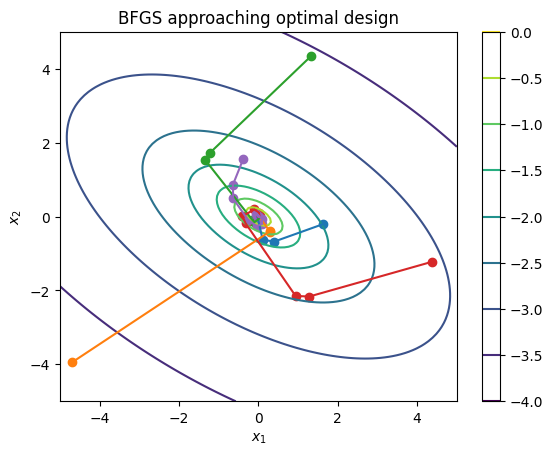

In [35]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

Z = np.zeros((100,100))
for i in range(100):
    for j in range(100):
        d = np.array([x[i], y[j]])
        Z[i][j] = mut_2(d.T, prior)

# Make the contour plot
fig, ax = plt.subplots()
contour = ax.contour(X, Y, Z)
for start in np.random.random((5,2)) * 10 - np.ones((5,2))*5:
    steps = get_optimal_design(start)
    ax.scatter(np.array(steps.allvecs)[:,0], np.array(steps.allvecs)[:,1])
    #for i in range(0, len(steps.allvecs), 2):
        #next_step = i + 1
        #if (i == len(steps.allvecs)):
        #    next_step = i
        #ax.arrow(steps.allvecs[i][0],steps.allvecs[i][1], steps.allvecs[next_step][0] - steps.allvecs[i][0], steps.allvecs[next_step][1] - steps.allvecs[i][1])
    ax.plot(np.array(steps.allvecs)[:,0], np.array(steps.allvecs)[:,1])
# Add a colorbar
cbar = fig.colorbar(contour)

# Add some labels and a title
ax.set_title('BFGS approaching optimal design')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

# Show the plot
plt.show()

/tmp/ipykernel_5901/1050895063.py:5: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  steps = optimize.minimize(f, start, method="BFGS", jac=grad(f), options={ "return_all": True })


Text(0.5, 1.0, 'Mutual Information per iteration for 4 datapoints')

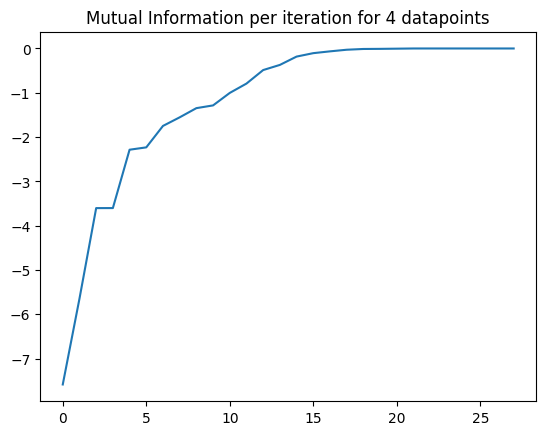

In [45]:
res = get_optimal_design(np.array([[1.2, 2.2], [3.3, 3.2], [2.5, 5.5], [9.5, -2.5]]))
plt.plot(range(len(res.allvecs)), [mut_2(d, prior) for d in res.allvecs])
plt.title("Mutual Information per iteration for 4 datapoints")